In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/PS_20174392719_1491204439457_log.csv", )

In [2]:
df.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
print("the total data num is "+str(len(df)))
print("the total fraud num is "+str(len(df.loc[df['isFraud'] == 1])))

the total data num is 6362620
the total fraud num is 8213


In [4]:
df['balance_error_orig'] = df['oldbalanceOrg']-df['amount']-df['newbalanceOrig']
df['balance_error_dest'] = df['oldbalanceDest']+df['amount']-df['newbalanceDest']

In [5]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_error_orig,balance_error_dest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,0.000000e+00,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,0.000000e+00,1864.28
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,0.000000e+00,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,0.000000e+00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,0.000000e+00,11668.14
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,0.000000e+00,7817.71
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,0.000000e+00,7107.77
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,0.000000e+00,7861.64
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,-1.353360e+03,4024.36
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,-7.275958e-12,6886.98


In [6]:
pmt = df.loc[df['type'] == 'PAYMENT']
cout = df.loc[df['type'] == 'CASH_OUT']
cin = df.loc[df['type'] == 'CASH_IN']
dbt = df.loc[df['type'] == 'DEBIT']
trans = df.loc[df['type'] == 'TRANSFER']

In [7]:
print('transfer and cashout data num is'+str(len(trans)+len(cout)))

transfer and cashout data num is2770409


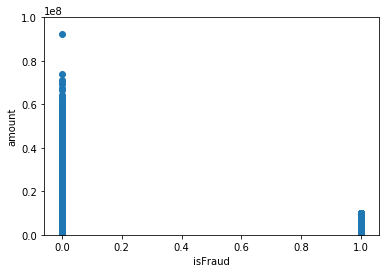

In [8]:
t_amount = trans['amount']
t_isFraud = trans['isFraud']
plt.scatter(t_isFraud,t_amount)
plt.xlabel("isFraud")
plt.ylabel("amount")
plt.ylim([0,100000000])
plt.show()

In [9]:
trans1 = trans.loc[trans['isFraud'] == 1]
trans0 = trans.loc[trans['isFraud'] == 0]

trans11 = trans1[['amount','balance_error_orig','balance_error_dest']]
trans00 = trans0[['amount','balance_error_orig','balance_error_dest']]

trans11.columns = ['amount_1','balance_error_orig_1','balance_error_dest_1']
trans00.columns = ['amount_0','balance_error_orig_0','balance_error_dest_0']

In [10]:
trans11.head(5)

,amount_1,balance_error_orig_1,balance_error_dest_1
2,181.00,0.0,181.00
251,2806.00,0.0,2806.00
680,20128.00,0.0,20128.00
969,1277212.77,0.0,1277212.77
1115,35063.63,0.0,35063.63


In [11]:
trans00.head(5)

,amount_0,balance_error_orig_0,balance_error_dest_0
19,215310.30,-2.146053e+05,237735.30
24,311685.89,-3.008509e+05,-2401220.00
58,62610.80,-3.637979e-12,54744.51
78,42712.39,-3.234900e+04,76569.87
79,77957.68,-7.795768e+04,150624.03


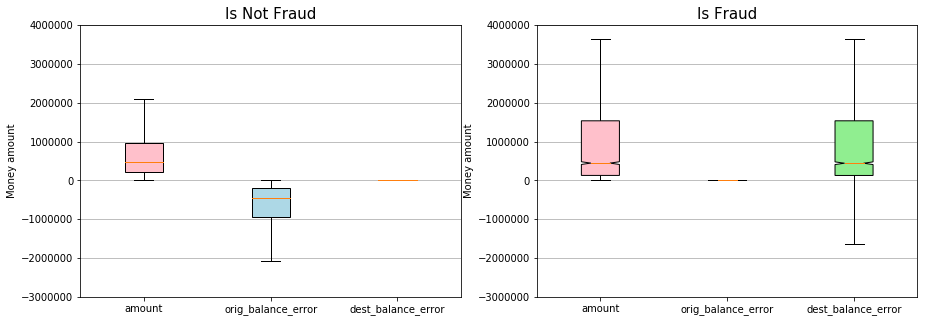

In [12]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_ylabel('Money amount') 
    ax.set_ylim([-3000000,4000000])
bplot1=axes[0].boxplot(trans00.values,vert=True,patch_artist=True,showfliers=False)
axes[0].set_title("Is Not Fraud",fontsize=15)

bplot2 = axes[1].boxplot(trans11.values,notch=True,vert=True,patch_artist=True,showfliers=False)
axes[1].set_title("Is Fraud",fontsize=15)

colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
plt.setp(axes, xticks=[1,2,3],xticklabels=['amount','orig_balance_error', 'dest_balance_error'])

        
plt.show()

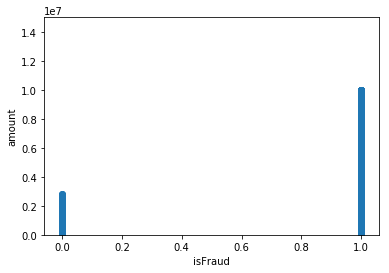

In [13]:
cout_amount = cout['amount']
cout_isFraud = cout['isFraud']
plt.scatter(cout_isFraud,cout_amount)
plt.xlabel("isFraud")
plt.ylabel("amount")
plt.ylim([0,15000000])
plt.show()

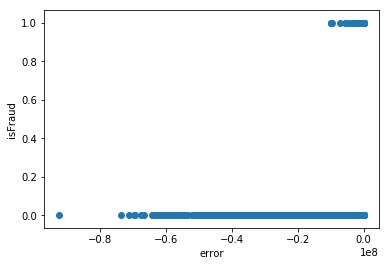

In [14]:
plt.scatter(trans['balance_error_orig'],trans['isFraud'])
plt.xlabel("error")
plt.ylabel("isFraud")

plt.show()

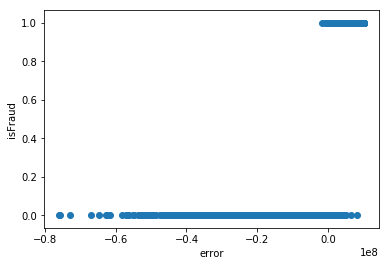

In [15]:
plt.scatter(trans['balance_error_dest'],trans['isFraud'])
plt.xlabel("error")
plt.ylabel("isFraud")

plt.show()

In [16]:
df.drop('nameOrig',axis=1,inplace=True)
df.drop('nameDest',axis=1,inplace=True)
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_error_orig,balance_error_dest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0,0.000000e+00,9839.64
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0,0.000000e+00,1864.28
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0,0.000000e+00,181.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0,0.000000e+00,21363.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0,0.000000e+00,11668.14
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0,0.000000e+00,7817.71
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0,0.000000e+00,7107.77
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0,0.000000e+00,7861.64
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0,-1.353360e+03,4024.36
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,-7.275958e-12,6886.98


In [17]:
type_mapping ={'CASH_OUT':1,'TRANSFER':2,'PAYMENT':3,'DEBIT':4,'CASH_IN':5}
df['type']=df['type'].map(type_mapping)
#filter the transfer and cashout data
procdata = df.loc[df['type'].isin([1,2])]
target = procdata['isFraud']
procdata=procdata.drop('isFraud',axis=1)
procdata.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balance_error_orig,balance_error_dest
2,1,2,181.00,181.00,0.0,0.0,0.00,0,0.000000e+00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,0,0.000000e+00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,-2.138089e+05,182703.50
19,1,2,215310.30,705.00,0.0,22425.0,0.00,0,-2.146053e+05,237735.30
24,1,2,311685.89,10835.00,0.0,6267.0,2719172.89,0,-3.008509e+05,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,-8.356930e+04,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,-5.501188e+04,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,-5.346890e+03,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,-2.849770e+03,49003.30
58,1,2,62610.80,79114.00,16503.2,517.0,8383.29,0,-3.637979e-12,54744.51


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(procdata,target, test_size=0.2)

In [19]:
X_train.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balance_error_orig,balance_error_dest
4404570,321,1,15587.34,0.0,0.0,214740.22,230327.56,0,-15587.34,0.000000e+00
4933032,350,2,1478466.56,15263.0,0.0,0.00,1478466.56,0,-1463203.56,0.000000e+00
5472072,379,1,101454.32,0.0,0.0,915701.10,1017155.42,0,-101454.32,-1.164153e-10
450914,19,1,146758.56,0.0,0.0,862345.94,1009104.51,0,-146758.56,-1.000000e-02
2985745,231,2,1732825.53,52328.0,0.0,5786015.50,7518841.03,0,-1680497.53,0.000000e+00


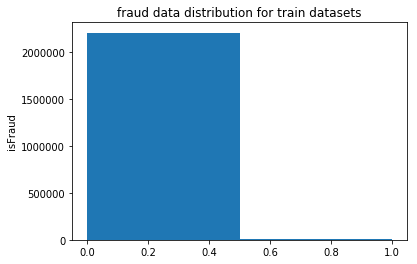

In [20]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=2)
plt.ylabel('isFraud')
plt.title('fraud data distribution for train datasets')
plt.show()


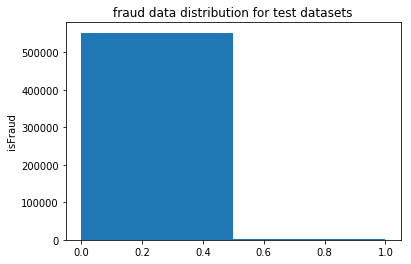

In [21]:
plt.hist(y_test, bins=2)
plt.ylabel('isFraud')
plt.title('fraud data distribution for test datasets')
plt.show()



In [22]:
from sklearn.metrics import f1_score

def getF1Score(y_true,y_pred):
    macro = f1_score(y_true, y_pred, average='macro')
    micro = f1_score(y_true, y_pred, average='micro')
    binary = f1_score(y_true, y_pred)
    return macro,micro,binary

In [23]:
#confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def drawConfusionMatrix(y_true, y_pred, 
                          normalize=False,
                          title=None):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax    

In [24]:
#precision and recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score


def plotPRcurve(y_true,y_score,title):
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title+' Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

In [25]:
# draw ROC Curve

from itertools import cycle

from sklearn.metrics import roc_curve, auc
from scipy import interp


def drawROC(y_true,y_score,title):
    

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
# plt.figure()
# lw = 2
# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [26]:
def drawroc(y_true,y_test,y_score,title):

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_true, y_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label=title+' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig(title)
    plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


f1_score is (0.9976776827245647, 0.9999729281947437, 0.9953689410311826)


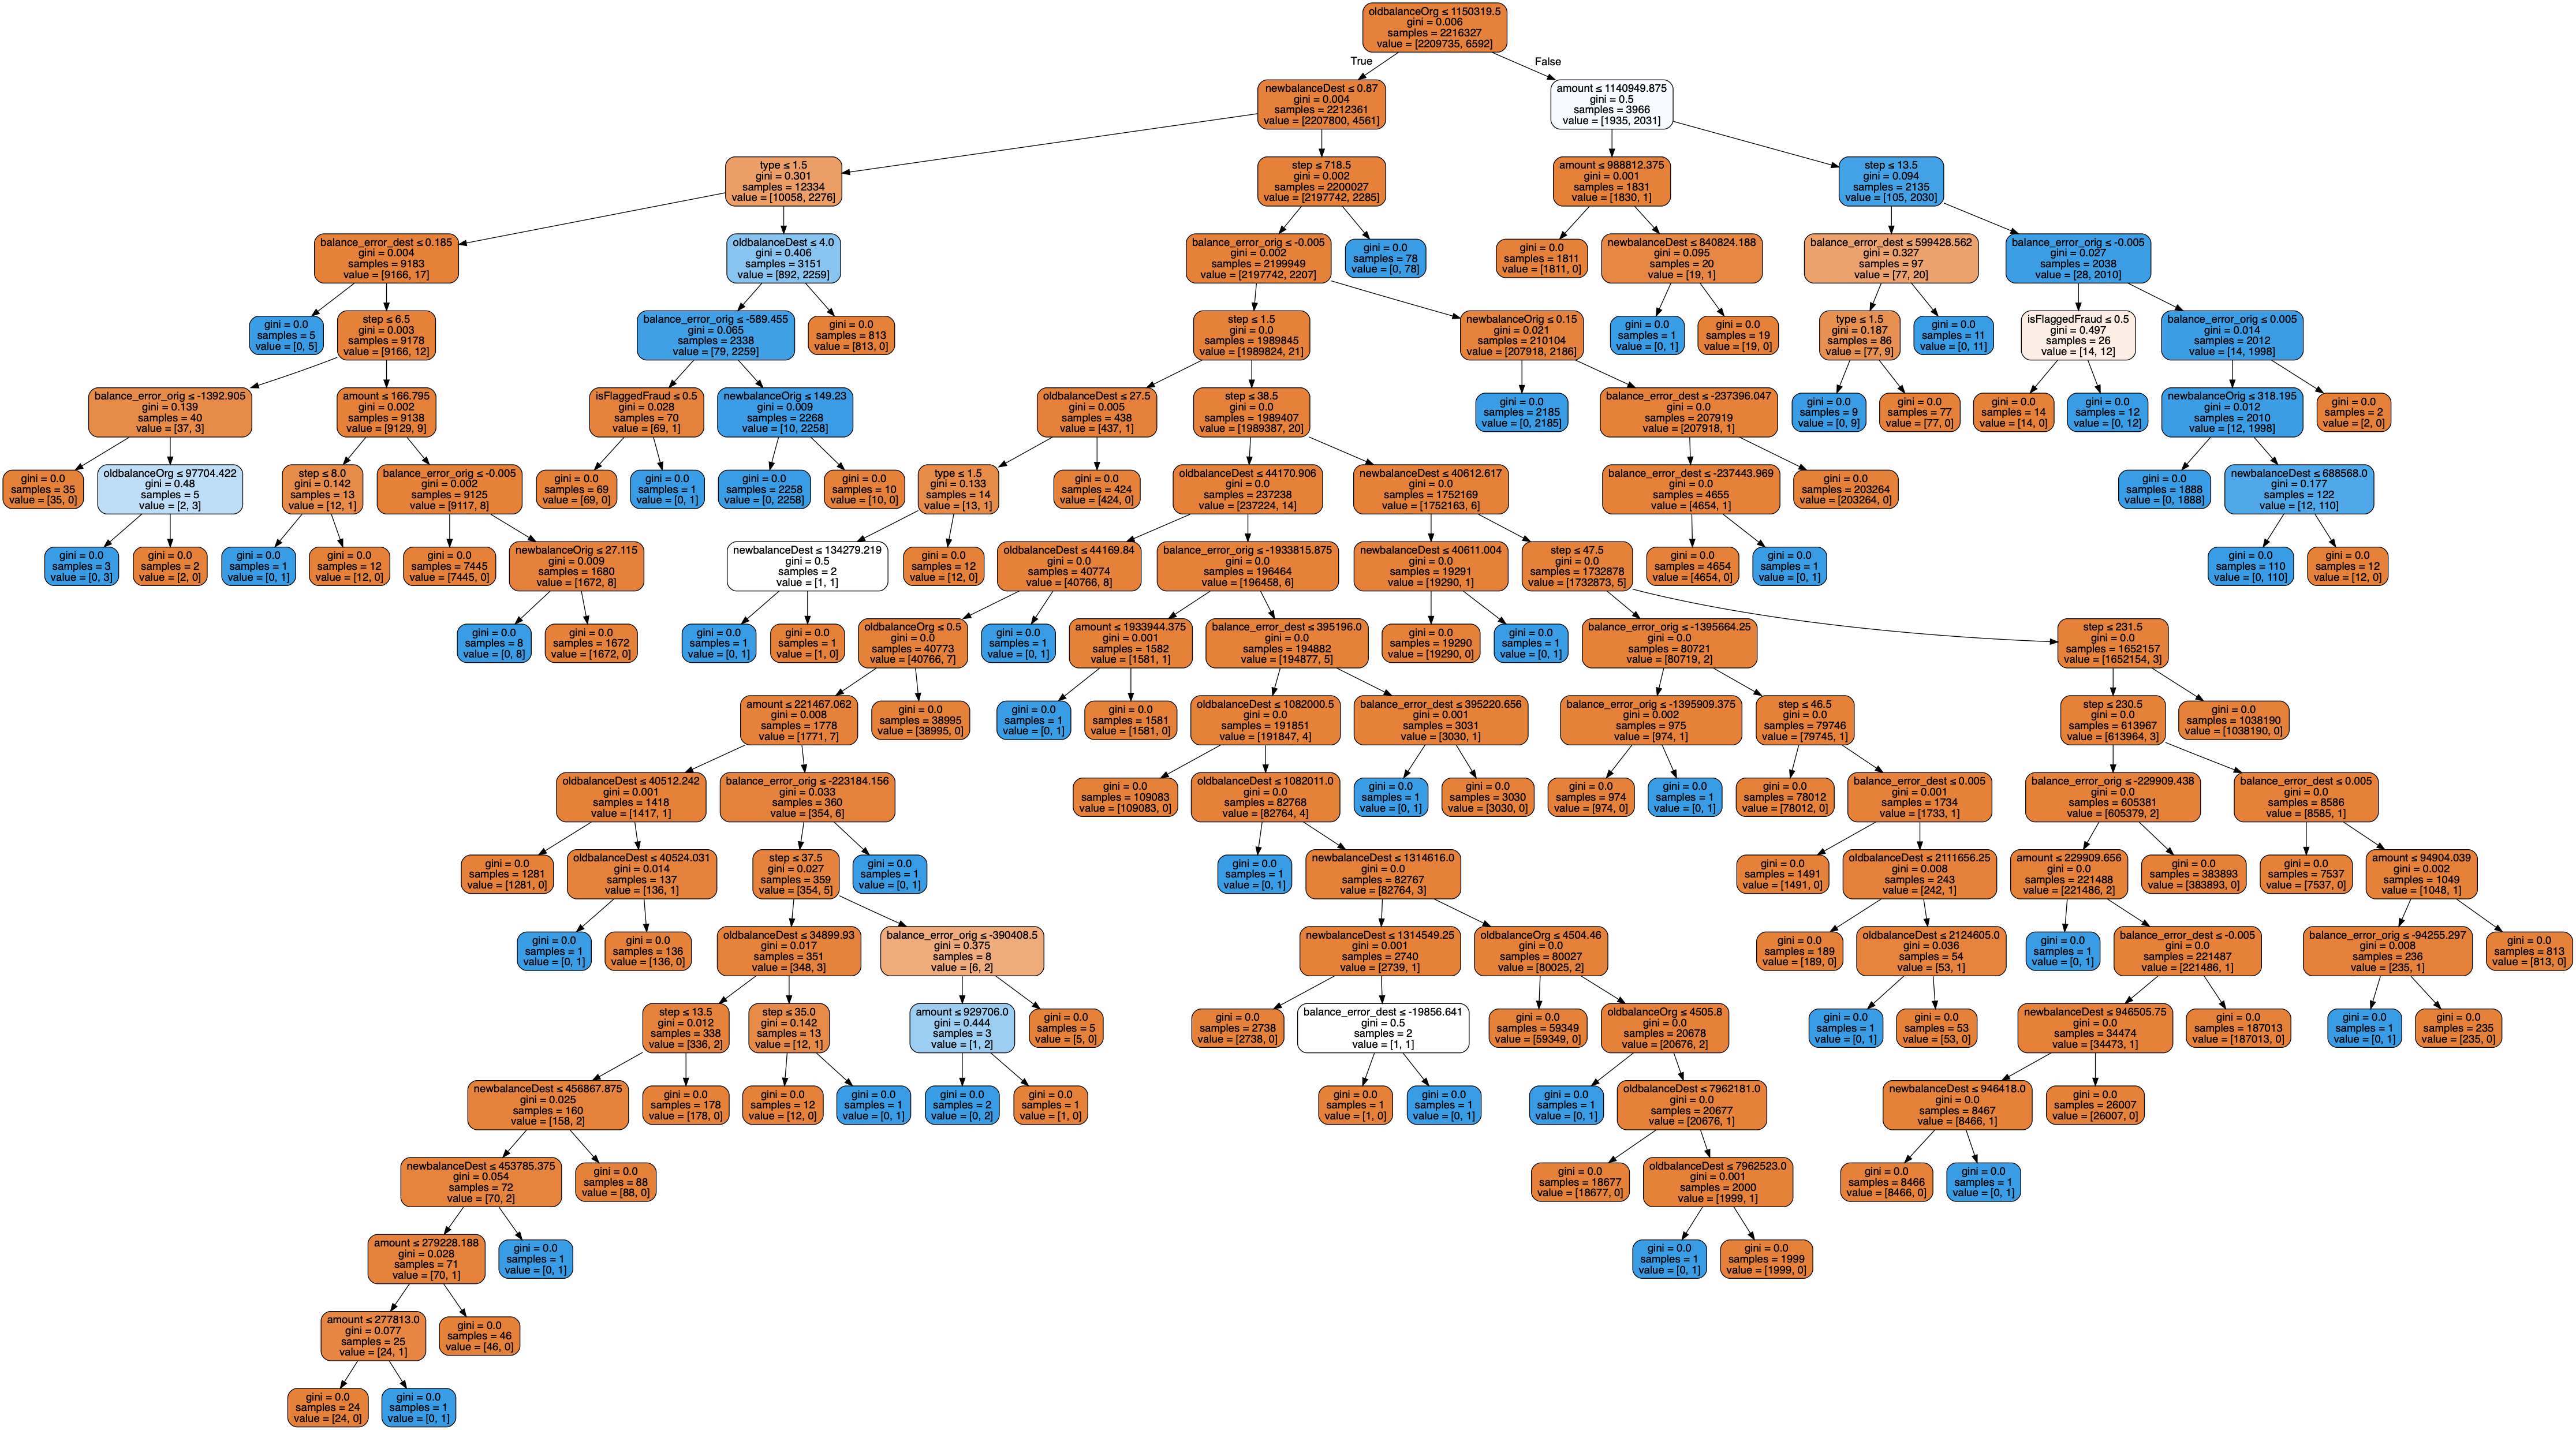

In [27]:
#decision tree
from sklearn import tree
import graphviz

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision = tree.DecisionTreeClassifier()
decision = decision.fit(X_train, y_train)
y_pred=decision.predict(X_test)
y_score=decision.predict_proba(X_test)
print("f1_score is "+str(getF1Score(y_test,y_pred)))

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_names_list=X_train.columns
export_graphviz(decision, out_file=dot_data, feature_names=feature_names_list, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Confusion matrix, without normalization
[[552455      6]
 [     9   1612]]


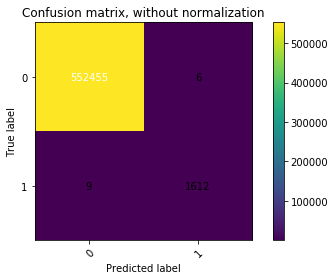

In [28]:
drawConfusionMatrix(y_test, y_pred, normalize=False,title=None)

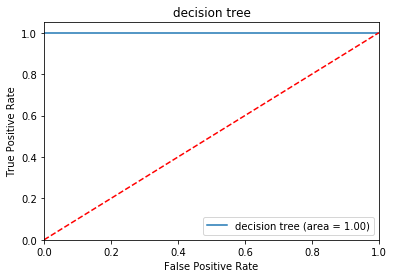

In [29]:
drawroc(y_test,y_pred,y_score[:,1],'decision tree')

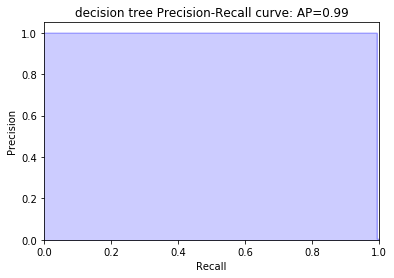

In [30]:

plotPRcurve(y_test,y_score[:,1],'decision tree')

In [37]:
# from sklearn import metrics
# def print_performance(y_true, y_pred,clf):
#     display(pd.DataFrame(metrics.confusion_matrix(y_true, y_pred)))
#     print(metrics.classification_report(y_true, y_pred))
#     print('Accuracy: {}'.format(metrics.accuracy_score(y_true, y_pred)))
#     print('ROC AUC: {}'.format(metrics.roc_auc_score(y_true, y_pred)))
#     dftest = pd.read_csv('test.csv', index_col=0)
#     testx = dftest.drop(['Churn', 'customerID'], axis=1)
#     testx['TotalCharges'] = pd.to_numeric(testx['TotalCharges'], errors='coerce')
#     testx = testx.fillna(0)
#     testy = dftest['Churn']

#     y_test_pred = clf.predict(testx)
#     print("\n Performance on test Set")
#     print_performance(testy, y_test_pred)
#     # plt.hist(testy)

#     ### plot feature importance
#     # 值越大，越重要
#     print (clf.feature_importances_)
# print_performance(y_test,y_pred,decision)

# from xgboost import plot_importance
# fig = plt.figure(figsize = (14, 9))
# ax = fig.add_subplot(111)

# colours = plt.cm.Set1(np.linspace(0, 1, 9))

# ax = plot_importance(decision, height = 1, color = colours, grid = False, \
#                      show_values = False, importance_type = 'cover', ax = ax);
# for axis in ['top','bottom','left','right']:
#             ax.spines[axis].set_linewidth(2)
        
# ax.set_xlabel('importance score', size = 16);
# ax.set_ylabel('features', size = 16);
# ax.set_yticklabels(ax.get_yticklabels(), size = 12);
# ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [32]:
X_train.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balance_error_orig,balance_error_dest
4404570,321,1,15587.34,0.0,0.0,214740.22,230327.56,0,-15587.34,0.000000e+00
4933032,350,2,1478466.56,15263.0,0.0,0.00,1478466.56,0,-1463203.56,0.000000e+00
5472072,379,1,101454.32,0.0,0.0,915701.10,1017155.42,0,-101454.32,-1.164153e-10
450914,19,1,146758.56,0.0,0.0,862345.94,1009104.51,0,-146758.56,-1.000000e-02
2985745,231,2,1732825.53,52328.0,0.0,5786015.50,7518841.03,0,-1680497.53,0.000000e+00


In [36]:
# svm
from sklearn import svm
svmclf=svm.LinearSVC()
# svmclf = svm.SVC()
svmclf.fit(X_train, y_train)
y_pred=svmclf.predict(X_test)
y_score = svmclf.score(X_test,y_test)

Confusion matrix, without normalization
[[550983   1478]
 [   233   1388]]


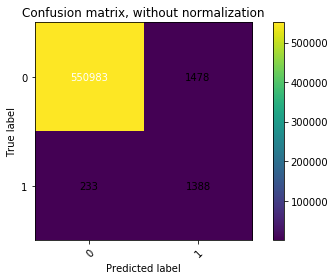

In [34]:
y_score = svmclf.score(X_test,y_test)
drawConfusionMatrix(y_test, y_pred, normalize=False,title=None)

In [35]:
print("f1_score is "+str(getF1Score(y_test,y_pred)))

f1_score is (0.808562951605428, 0.9969120094137691, 0.6186761756184533)
